In [34]:
%matplotlib inline
from sklearn.svm import SVC
import mglearn
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
path = '/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
rc('font', family='AppleGothic')

In [4]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

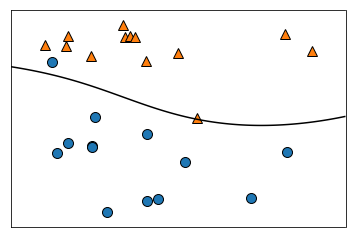

In [5]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
sv = svm.support_vectors_

Text(0,0.5,'특성 1')

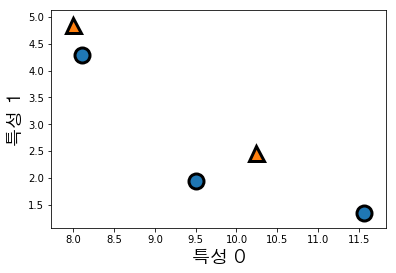

In [21]:
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0", fontproperties=fontprop)
plt.ylabel("특성 1", fontproperties=fontprop)

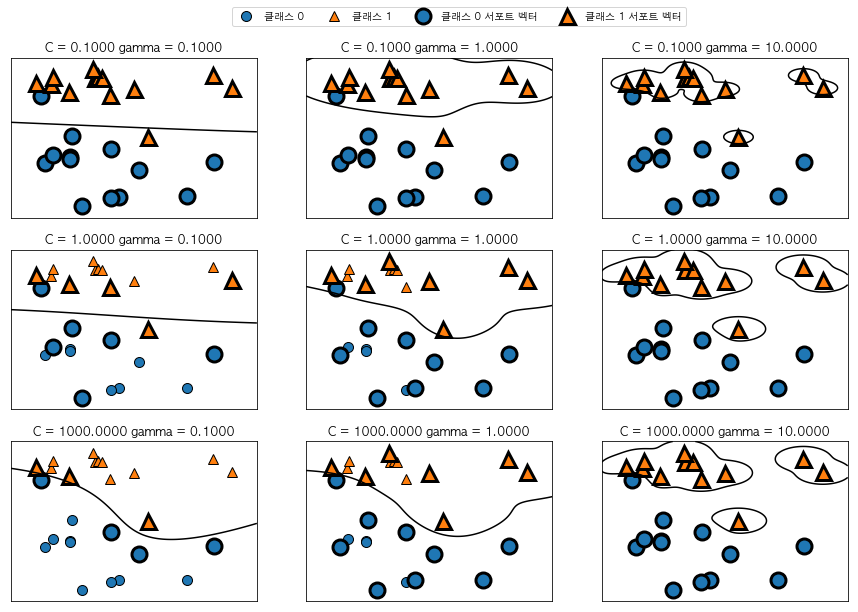

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터",
                  "클래스 1 서포트 벡터"], ncol=4, loc=(.9, 1.2))

In [33]:
import matplotlib
import matplotlib.font_manager

[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist]

[('cmr10',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf'),
 ('STIXSizeFourSym',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf'),
 ('cmsy10',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf'),
 ('DejaVu Sans Mono',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf'),
 ('STIXSizeFourSym',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf'),
 ('STIXSizeThreeSym',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf'),
 ('STIXSizeThreeSym',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf'),
 ('cmb10',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf'),
 ('DejaVu Sans',
  '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.t

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [41]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0,0.5,'특성 크기')

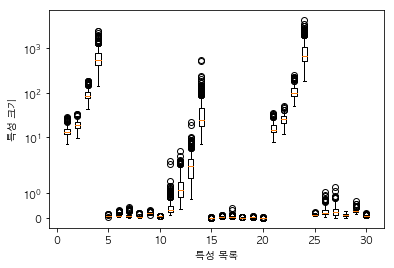

In [46]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [47]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

In [50]:
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [61]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [52]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


In [66]:
# increase C
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972
